In [8]:
# Importing libraries
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import joblib

In [5]:
# setting up graphs bg
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [6]:
# create folders if they dont exist
Path("../data/processed").mkdir(parents=True, exist_ok=True)
Path("../models").mkdir(parents=True, exist_ok=True)
Path("../visuals").mkdir(parents=True, exist_ok=True)

In [18]:
# an function that gives us the value of R^2, MAE, RMSE and predcitions
def evaluate_model(name, model, X_test, Y_test):
    preds = model.predict(X_test)
    r2 = r2_score(Y_test, preds)
    mae = mean_absolute_error(Y_test, preds)
    rmse = np.sqrt(mean_squared_error(Y_test, preds))
    d = {
        "model": name,
        "R2":r2,
        "MAE": mae,
        "RMSE":rmse,
        "preds": preds
        }
    return d

In [9]:
# Load the datasets

proc_path = Path("../data/processed/model_data.csv")
if proc_path.exists():
    print("Loading processed dataset: ", proc_path)
    df = pd.read_csv(proc_path)
else:
    print("Issues in finding dataset")
    sys.exit(1)

Loading processed dataset:  ..\data\processed\model_data.csv


In [10]:
# Quick diagnostics
print("shape: ", df.shape)
print("Columns: ", list(df.columns))
print("data types: ")
display(df.dtypes)

print("head: ")
display(df.head())

print("summary: ")
display(df.describe().T)


shape:  (7403, 53)
Columns:  ['Country Code', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range', 'Aggregate rating', 'Votes', 'City_Freq', 'Cuisine_Grouped_Asian', 'Cuisine_Grouped_BBQ', 'Cuisine_Grouped_Bakery', 'Cuisine_Grouped_Bengali', 'Cuisine_Grouped_Beverages', 'Cuisine_Grouped_Biryani', 'Cuisine_Grouped_Brazilian', 'Cuisine_Grouped_Breakfast', 'Cuisine_Grouped_British', 'Cuisine_Grouped_Burger', 'Cuisine_Grouped_Cafe', 'Cuisine_Grouped_Chinese', 'Cuisine_Grouped_Continental', 'Cuisine_Grouped_Desserts', 'Cuisine_Grouped_European', 'Cuisine_Grouped_Fast Food', 'Cuisine_Grouped_Finger Food', 'Cuisine_Grouped_French', 'Cuisine_Grouped_Goan', 'Cuisine_Grouped_Healthy Food', 'Cuisine_Grouped_Ice Cream', 'Cuisine_Grouped_Indian', 'Cuisine_Grouped_International', 'Cuisine_Grouped_Italian', 'Cuisine_Grouped_Japanese', 'Cuisine_Grouped_Kashmiri', 'Cuisine_Grouped_Kebab', 'Cuisine_Grouped_Kerala', 'Cuisine_Grouped_Lebanese', 'Cuisine_Grouped_Mediterranean'

Country Code                       int64
Average Cost for two               int64
Has Table booking                  int64
Has Online delivery                int64
Price range                        int64
Aggregate rating                 float64
Votes                              int64
City_Freq                          int64
Cuisine_Grouped_Asian               bool
Cuisine_Grouped_BBQ                 bool
Cuisine_Grouped_Bakery              bool
Cuisine_Grouped_Bengali             bool
Cuisine_Grouped_Beverages           bool
Cuisine_Grouped_Biryani             bool
Cuisine_Grouped_Brazilian           bool
Cuisine_Grouped_Breakfast           bool
Cuisine_Grouped_British             bool
Cuisine_Grouped_Burger              bool
Cuisine_Grouped_Cafe                bool
Cuisine_Grouped_Chinese             bool
Cuisine_Grouped_Continental         bool
Cuisine_Grouped_Desserts            bool
Cuisine_Grouped_European            bool
Cuisine_Grouped_Fast Food           bool
Cuisine_Grouped_

head: 


,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,City_Freq,Cuisine_Grouped_Asian,Cuisine_Grouped_BBQ,...,Cuisine_Grouped_Other,Cuisine_Grouped_Pizza,Cuisine_Grouped_Raw Meats,Cuisine_Grouped_Seafood,Cuisine_Grouped_South Indian,Cuisine_Grouped_Steak,Cuisine_Grouped_Street Food,Cuisine_Grouped_Sushi,Cuisine_Grouped_Thai,Cuisine_Grouped_Tibetan
0,6,1100,1,0,3,4.8,314,2,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6,1200,1,0,3,4.5,591,2,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6,4000,1,0,4,4.4,270,4,False,False,...,False,False,False,True,False,False,False,False,False,False
3,6,1500,0,0,4,4.9,365,4,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,1500,1,0,4,4.8,229,4,False,False,...,False,False,False,False,False,False,False,False,False,False


summary: 


,count,mean,std,min,25%,50%,75%,max
Country Code,7403.0,1.317979,3.841803,0.0,0.0,0.0,0.0,14.0
Average Cost for two,7403.0,1448.415102,18303.524265,0.0,300.0,500.0,800.0,800000.0
Has Table booking,7403.0,0.150074,0.357168,0.0,0.0,0.0,0.0,1.0
Has Online delivery,7403.0,0.318114,0.465776,0.0,0.0,0.0,1.0,1.0
Price range,7403.0,1.970147,0.930611,1.0,1.0,2.0,3.0,4.0
Aggregate rating,7403.0,3.440024,0.552195,1.8,3.0,3.4,3.8,4.9
Votes,7403.0,202.185060,479.195199,4.0,19.0,60.0,181.0,10934.0
City_Freq,7403.0,3237.888694,2481.343108,1.0,1080.0,5473.0,5473.0,5473.0


In [12]:
# null check
null_count = df.isnull().sum().sum()
print("Null values: ", null_count)

# existance of required target 
assert "Aggregate rating" in df.columns, "ERROR: 'Aggregate rating' column missing!"
min_rating = df["Aggregate rating"].min()
print("Aggregate rating: ", min_rating)
assert min_rating > 0.0, "ERROR: Found unrated rows (rating == 0.0). Remove them before training."

Null values:  0
Aggregate rating:  1.8


In [13]:
#Train test split
models_dir = Path("../models")
models_dir.mkdir(parents=True, exist_ok=True)
# try load existing splits; otherwise create and save new ones
try:
    X_train = joblib.load(models_dir / "X_train.joblib")
    X_test  = joblib.load(models_dir / "X_test.joblib")
    Y_train = joblib.load(models_dir / "Y_train.joblib")
    Y_test  = joblib.load(models_dir / "Y_test.joblib")
    print("Loaded existing train/test splits from ../models/")
except Exception as e:
    X = df.drop("Aggregate rating", axis=1)
    Y = df["Aggregate rating"]
    print("No existing splits found (or failed to load). Creating new splits now...")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
    joblib.dump(X_train, models_dir / "X_train.joblib")
    joblib.dump(X_test,  models_dir / "X_test.joblib")
    joblib.dump(Y_train, models_dir / "Y_train.joblib")
    joblib.dump(Y_test,  models_dir / "Y_test.joblib")
    print("Saved new train/test splits to ../models/")

Loaded existing train/test splits from ../models/


In [16]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("Y_train distribution summary:")
print(Y_train.describe().to_string())
print("Y_test distribution summary:")
print(Y_test.describe().to_string())

X_train shape: (5922, 52)
X_test  shape: (1481, 52)
Y_train distribution summary:
count    5922.000000
mean        3.440831
std         0.551203
min         1.800000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000
Y_test distribution summary:
count    1481.000000
mean        3.436799
std         0.556318
min         2.100000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000


In [20]:
# A baseline model test
lr = LinearRegression()
lr.fit(X_train, Y_train)

lr_results = evaluate_model("Linear Regression", lr, X_test, Y_test)
lr_results

{'model': 'Linear Regression',
 'R2': 0.43652196310824964,
 'MAE': 0.3298013675045225,
 'RMSE': np.float64(0.4174599051288019),
 'preds': array([2.99580584, 3.55826442, 3.00333   , ..., 3.15203516, 3.36474929,
        3.2834962 ], shape=(1481,))}

In [21]:
# Decision Tree Baseline Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)

dt_results = evaluate_model("Decision Tree", dt, X_test, Y_test)
dt_results

{'model': 'Decision Tree',
 'R2': 0.31013304593740965,
 'MAE': 0.3387725475065111,
 'RMSE': np.float64(0.46191168057336374),
 'preds': array([2.9, 3.5, 3.1, ..., 3.9, 3.3, 2.8], shape=(1481,))}

In [24]:
# We have observed some overfiting here...
# To cancel that we will use random forest model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=24,
    n_jobs=-1
)
rf.fit(X_train, Y_train)

rf_results = evaluate_model("Random Forest", rf, X_test, Y_test)
rf_results

{'model': 'Random Forest',
 'R2': 0.5892939413584266,
 'MAE': 0.26540077834284026,
 'RMSE': np.float64(0.35640339174702973),
 'preds': array([2.93360476, 3.3135    , 2.954     , ..., 3.731     , 3.2194377 ,
        2.83      ], shape=(1481,))}

In [25]:
# Random Forest has show better results than linear Regression and Decision Tree
# we will save it
models_dir = Path("../models")
best_model_path = models_dir / "best_model_random_forest.joblib"
joblib.dump(rf, best_model_path)

# also save the features
feature_list_path = models_dir / "feature_list.joblib"
joblib.dump(list(X_train.columns), feature_list_path)

# Now lets save predictions and true values
preds_path = models_dir / "rf_predictions.joblib"
joblib.dump({"Y_test": Y_test, "preds": rf_results["preds"]}, preds_path)

['..\\models\\rf_predictions.joblib']

In [26]:
print("Saved:")
print(" - Best model      →", best_model_path)
print(" - Feature list    →", feature_list_path)
print(" - RF Predictions  →", preds_path)

Saved:
 - Best model      → ..\models\best_model_random_forest.joblib
 - Feature list    → ..\models\feature_list.joblib
 - RF Predictions  → ..\models\rf_predictions.joblib


Saved visual: ../visuals/pred_vs_actual_random_forest.png


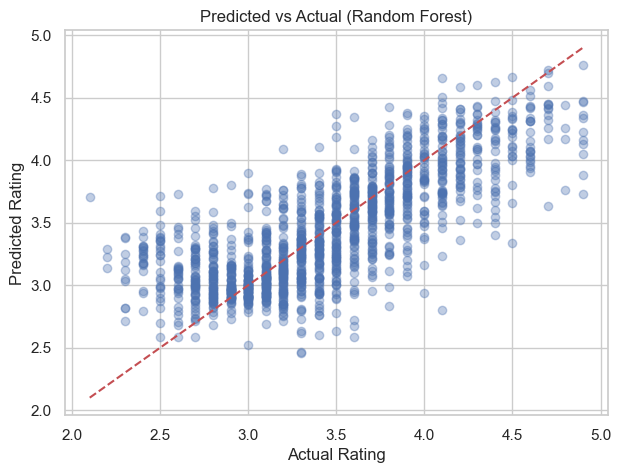

In [28]:
# We are gonna plot the predicted and actual values to see the distribution
# scatter plot Predicted vs Actual Scatter Plot
Y_true = Y_test.values
Y_pred = rf_results["preds"]
plt.figure(figsize=(7,5))
plt.scatter(Y_true, Y_pred, alpha=0.35)
plt.plot([Y_true.min(), Y_true.max()], [Y_true.min(), Y_true.max()], 'r--')

plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted vs Actual (Random Forest)")

# saving the image
out1 = "../visuals/pred_vs_actual_random_forest.png"
plt.savefig(out1, dpi=150)
print("Saved visual:", out1)

plt.show()

Saved visual:  ../visuals/residuals_random_forest.png


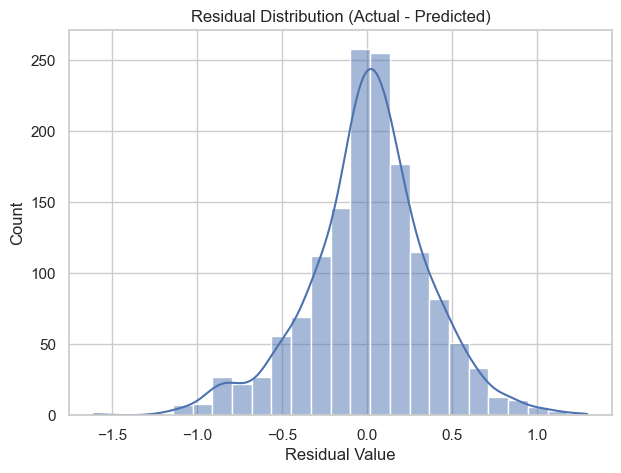

In [29]:
# Residual Distribution Plot

residuals = Y_true - Y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=25)
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual Value")

# saving the image
out2 = "../visuals/residuals_random_forest.png"
plt.savefig(out2, dpi=150)
print("Saved visual: ", out2)

plt.show()

In [ ]:
# Hyperparamter tunning
# Defining Hyperparamter space
